In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


import joblib
import pickle
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Iteratively read files
import glob
import os

In [5]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [6]:
data=pd.read_csv('SMSCollection.csv')
data.head(2)

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [7]:
data.isnull().sum()

Class    0
sms      0
dtype: int64

<Axes: >

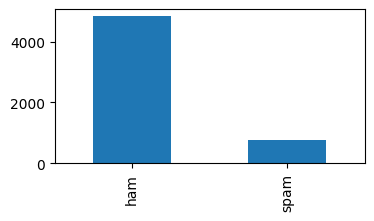

In [9]:
plt.figure(figsize=(4,2))
data.Class.value_counts().plot(kind='bar')

In [10]:
heading_ham = data[data["Class"]=="ham"]["sms"]
print(heading_ham.shape)
heading_ham[0:5]


(4825,)


0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: sms, dtype: object

Create Wordcloud¶

In [11]:
heading_ham = data[data["Class"]=="ham"]["sms"] # Extract only heading of emails for Ham tags
collapsed_heading_ham = heading_ham.str.cat(sep=' ')


In [12]:
heading_spam = data[data["Class"]=="spam"]["sms"] # Extract only heading of emails for spam tags
collapsed_heading_spam = heading_spam.str.cat(sep=' ') # Combining all the emails into one large text


Word Cloud for Genuine emails


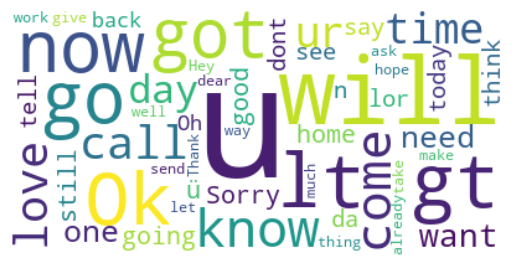


Word Cloud for Spam emails


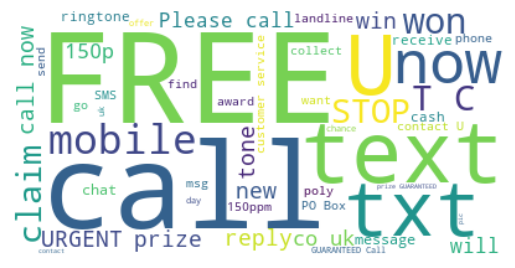

In [14]:
stopwords = set(STOPWORDS)
stopwords.update(["Subject","re","fw","fwd"])

print("Word Cloud for Genuine emails")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_ham)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("\nWord Cloud for Spam emails")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_spam)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Splitting Data -Train & Test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data["sms"], data["Class"],random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape


((4457,), (1115,), (4457,))

Prediction of Spam emails from Given set of emails

In [16]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])


In [17]:
model = clf.fit(X_train,y_train)

In [18]:
print("Accuracy of Naive Bayes Classifier is {}".format(model.score(X_test,y_test)))


Accuracy of Naive Bayes Classifier is 0.97847533632287


In [19]:
# Predict on Test data
y_predicted = model.predict(X_test)
y_predicted[0:10]


array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham'], dtype='<U4')

In [21]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix



array([[966,   0],
       [ 24, 125]], dtype=int64)

In [ ]:
import joblib

In [22]:
joblib.dump(model,open("email_classfier_V1.0.model","wb"))


In [25]:
model1=joblib.load(open("email_classfier_V1.0.model",'rb'))

In [26]:
model1.predict(["You save Rupees 100"])

array(['ham'], dtype='<U4')

In [27]:
model1.predict(["you are selected"])

array(['ham'], dtype='<U4')

In [28]:
model1.predict(["Free entry in 2 a"])

array(['spam'], dtype='<U4')